# K-MEANS CLUSTERING##
From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [1]:
# Importing certain libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.cluster import KMeans

## Understanding the data ##

In [2]:
# Reading the data from the dataset
data = pd.read_csv(r"D:\TSF\Task 3\Iris.csv")

# Displaying the data stored
data.head(151)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# For calculating the ideal number of clusters, we will unique functions to classify the number of species present
data["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

So, according to dataset, there should be ideally 3 clusters for this dataset.

In [4]:
# Gathering the basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# Data types
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [6]:
# Checking for any null values or missing values
data.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

Since, there are no null or missing values, therefore we can move further for exploration.

In [7]:
# Divide the data into features and labels
X = data.drop(["Species"], axis = 1)
y = data["Species"]
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


## Visualizing the data ##

<Figure size 1440x720 with 0 Axes>

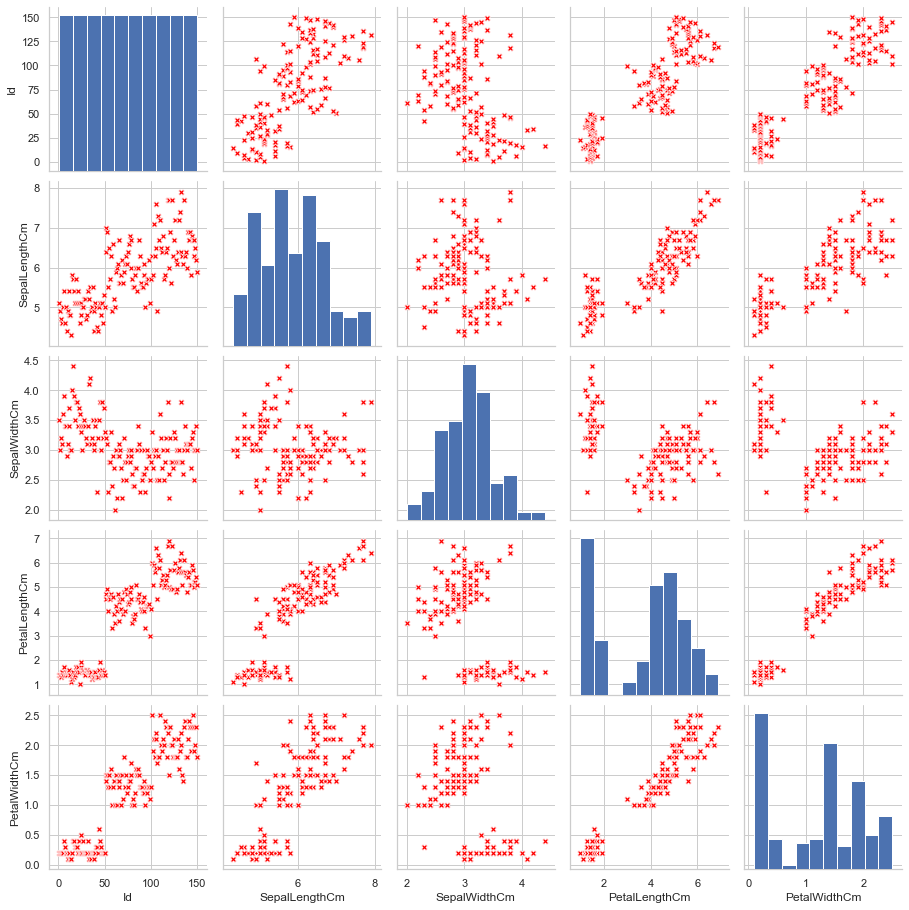

In [8]:
# First, Using pairplot plot for visualizing the given dataset
sb.set(style = "whitegrid")
plt.figure(figsize = (20, 10))
sb.pairplot(X, plot_kws = {"color" : "red"}, markers = "X")

Pairplot is arguably, one of the most efficent data visualising tool which can be used.

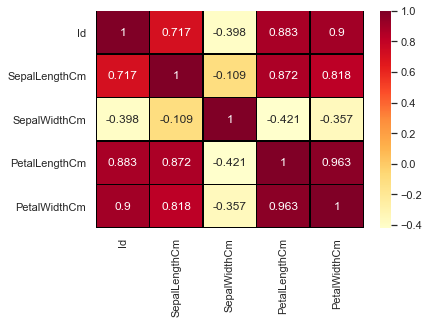

In [9]:
# Second, using heatmap for correlation plot
sb.heatmap(X.corr(), annot = True, fmt = ".3g", linewidth = 0.5, linecolor = "Black", cmap = "YlOrRd")

Now, before we move further, first we have to feature scale our data as if features aill be on different scale, it will not be accurate and right as it should be. Besides, it is a very good and appealing property that one should follow for ML projects.

## Feature Scaling ##

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[-1.72054204e+00 -9.00681170e-01  1.03205722e+00 -1.34127240e+00
  -1.31297673e+00]
 [-1.69744751e+00 -1.14301691e+00 -1.24957601e-01 -1.34127240e+00
  -1.31297673e+00]
 [-1.67435299e+00 -1.38535265e+00  3.37848329e-01 -1.39813811e+00
  -1.31297673e+00]
 [-1.65125846e+00 -1.50652052e+00  1.06445364e-01 -1.28440670e+00
  -1.31297673e+00]
 [-1.62816394e+00 -1.02184904e+00  1.26346019e+00 -1.34127240e+00
  -1.31297673e+00]
 [-1.60506942e+00 -5.37177559e-01  1.95766909e+00 -1.17067529e+00
  -1.05003079e+00]
 [-1.58197489e+00 -1.50652052e+00  8.00654259e-01 -1.34127240e+00
  -1.18150376e+00]
 [-1.55888037e+00 -1.02184904e+00  8.00654259e-01 -1.28440670e+00
  -1.31297673e+00]
 [-1.53578584e+00 -1.74885626e+00 -3.56360566e-01 -1.34127240e+00
  -1.31297673e+00]
 [-1.51269132e+00 -1.14301691e+00  1.06445364e-01 -1.28440670e+00
  -1.44444970e+00]
 [-1.48959680e+00 -5.37177559e-01  1.49486315e+00 -1.28440670e+00
  -1.31297673e+00]
 [-1.46650227e+00 -1.26418478e+00  8.00654259e-01 -1.22754100e+00

In [11]:
dist = []
for i in range(1, 10):
    cluster = KMeans(i)
    cluster = cluster.fit(X_scaled)
    dist.append(cluster.inertia_)
print(dist) 
print(cluster)

[750.0, 273.7275610947794, 177.05608895062974, 148.57320338677383, 123.17263095273616, 100.5835409482512, 90.50545215023718, 81.81604762511952, 73.23150368123758]
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


Here, we are using an elbow method which is used to determine the number of clusters. Basically, it is one of the basic methods but not always quite useful. If the curve is gradual, then there can be unsurity of number of clusters to be selected.

## Elbow Method ##

Text(0, 0.5, 'Distance (dist)')

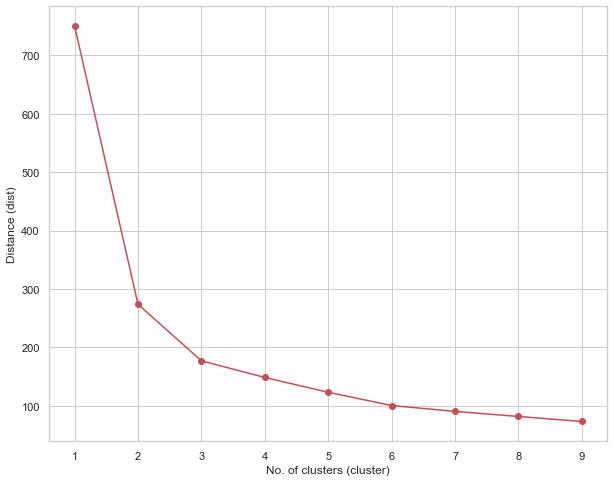

In [12]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, 10), dist, "r-o")
plt.xlabel("No. of clusters (cluster)")
plt.ylabel("Distance (dist)")

So, we can clearly see that the curve above is gradually decreasing from 3. Therefore, we select 3 as no. of clusters.

## Applying KMeans Classifier ##


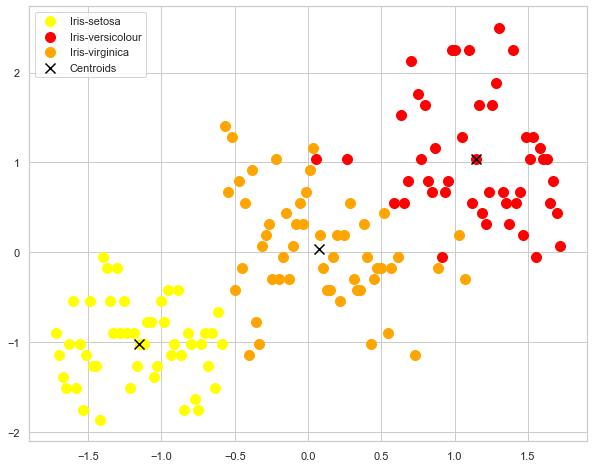

In [13]:
kmeans = KMeans(3)
kmeans.fit(X_scaled)
predictions = kmeans.fit_predict(X_scaled)

sb.set(style = "whitegrid")
plt.figure(figsize = (10, 8))
plt.scatter(X_scaled[predictions == 0, 0], X_scaled[predictions == 0, 1], s = 100, c = "yellow", label = "Iris-setosa")
plt.scatter(X_scaled[predictions == 1, 0], X_scaled[predictions == 1, 1], s = 100, c = "red", label = "Iris-versicolour")
plt.scatter(X_scaled[predictions == 2, 0], X_scaled[predictions == 2, 1], s = 100, c = "orange", label = "Iris-virginica")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = "black", label = "Centroids", marker = "x", linewidths = 20)

plt.legend()

So, here above is the KMeans classification of the IRIS dataset with 3 clusters, defining as optimum number of clusters. 

## Accuracy of KMeans Classifier

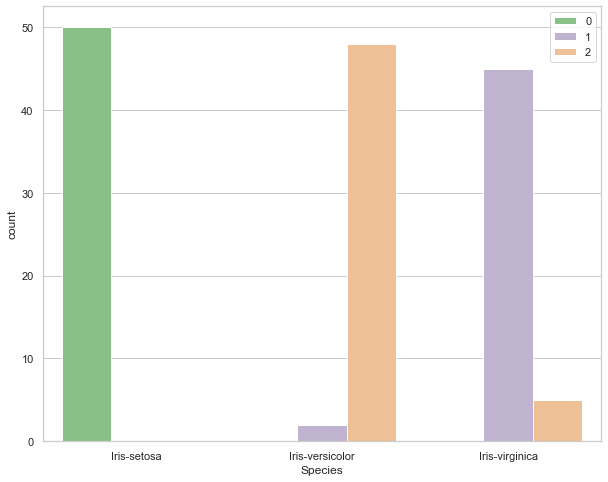

In [14]:
# Using Countplot for this
plt.figure(figsize=(10, 8))
sb.countplot(x = data['Species'], hue = predictions, palette = "Accent");

Iris - Versicolor is Cluster 0.....
    Iris - Setosa is Cluster 1.....
        Iris - Virginica is Cluster 2.....

# ASSIGNMENT COMPLETED